In [15]:
from google.colab import files
uploaded = files.upload()

Saving sales.xlsx to sales (1).xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('sales.xlsx')
df.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,OrderID,OrderDate,CustomerName,Product,Category,Quantity,UnitPrice,SalesRep,Region,TotalPrice
0,ORD1140,45774,William Velasquez MD,Tablet,Electronics,1,399,Karen,Tanta,399
1,ORD1149,45722,Larry Thomas,Camera,Electronics,1,434,Anthony,Cairo,434
2,ORD1052,45680,Sean Hughes,Tablet,Electronics,1,467,Maria,Cairo,467
3,ORD1053,45699,Peter Mcdowell,Headphones,Accessories,1,467,Derek,Mansoura,467
4,ORD1066,45730,Diane Atkinson,Charger,Accessories,1,536,Daniel,Tanta,536


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       200 non-null    object
 1   OrderDate     200 non-null    int64 
 2   CustomerName  200 non-null    object
 3   Product       200 non-null    object
 4   Category      200 non-null    object
 5   Quantity      200 non-null    int64 
 6   UnitPrice     200 non-null    int64 
 7   SalesRep      200 non-null    object
 8   Region        200 non-null    object
 9   TotalPrice    200 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 15.8+ KB


,0
OrderID,0
OrderDate,0
CustomerName,0
Product,0
Category,0
Quantity,0
UnitPrice,0
SalesRep,0
Region,0
TotalPrice,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [17]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [ ]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [18]:
total_sales = df['TotalPrice'].sum()
total_sales

np.int64(1004145)

In [19]:
df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False)

,TotalPrice
Product,
Phone,209918
Tablet,187383
Charger,171990
Camera,156044
Laptop,149208
Headphones,129602


In [20]:
df.groupby('Category')['TotalPrice'].sum()

,TotalPrice
Category,
Accessories,353962
Electronics,385235
Mobiles,264948


In [21]:
df.groupby('SalesRep')['TotalPrice'].sum().sort_values(ascending=False)

,TotalPrice
SalesRep,
Timothy,29152
Michael,22816
Kenneth,21610
Matthew,19676
Austin,18300
...,...
Jerry,758
Collin,720
Christine,663


In [22]:
df.groupby('Region')['TotalPrice'].sum().sort_values(ascending=False)

,TotalPrice
Region,
Tanta,260733
Alexandria,227899
Mansoura,214418
Giza,157546
Cairo,143549


In [31]:
sales_by_region = df.groupby('Region')['TotalPrice'].sum()
sales_by_region

,TotalPrice
Region,
Alexandria,227899
Cairo,143549
Giza,157546
Mansoura,214418
Tanta,260733


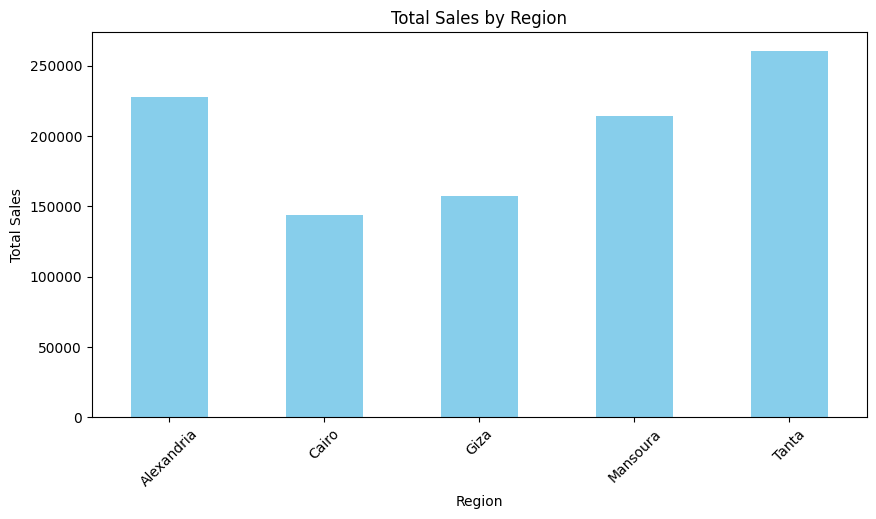

In [32]:
import matplotlib.pyplot as plt

sales_by_region.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [27]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['month'] = df['OrderDate'].dt.month

In [28]:
df.groupby('month')['TotalPrice'].sum()

,TotalPrice
month,
1,1004145


In [25]:
df.groupby('CustomerName')['OrderID'].count().sort_values(ascending=False).head(5)

,OrderID
CustomerName,
Aaron Khan,1
Aaron Parker,1
Adam Smith,1
Adam Wagner,1
Albert Williamson,1


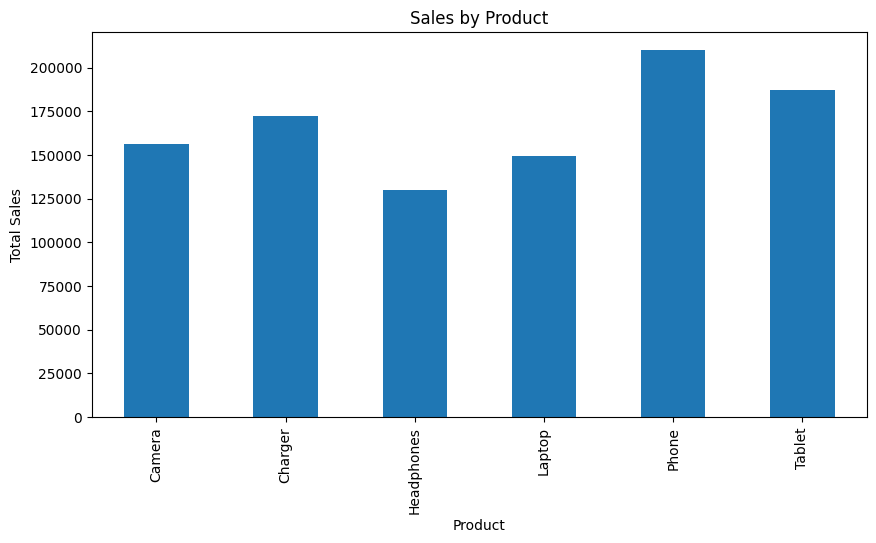

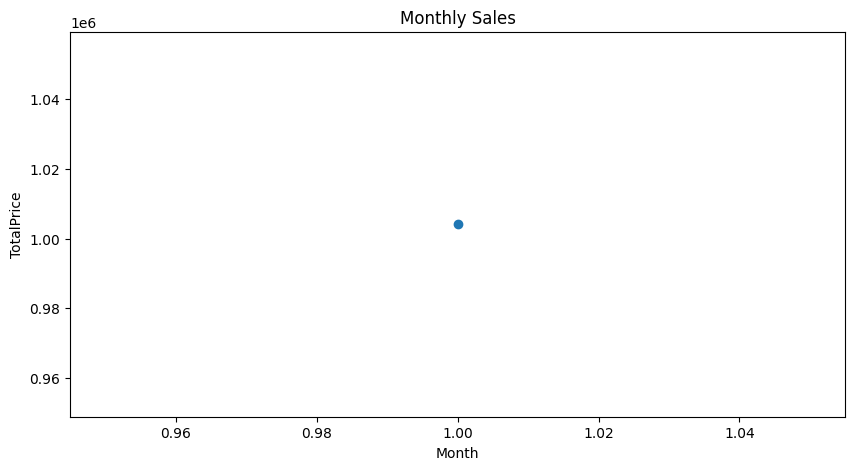

In [29]:
import matplotlib.pyplot as plt


df.groupby('Product')['TotalPrice'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


df.groupby('month')['TotalPrice'].sum().plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('TotalPrice')
plt.show()

In [33]:
df.to_excel('Cleaned_Sales.xlsx', index=False)
files.download('Cleaned_Sales.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
df.to_csv('Cleaned_Sales.csv', index=False)
files.download('Cleaned_Sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>